## Data Scientist's Salary Prediction Problem

![image](https://www.altexsoft.com/media/2018/04/Public-datasets-featured.jpg)

In [1]:
!pip install HTMLParser

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 19.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt


import html
from html.parser import HTMLParser

# sklearn libraries
# models
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, r2_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [3]:
# Changing directory
os.chdir(r'C:\Users\ganes\Desktop\Sem\Semester 3\MIE 1624 Introduction to Data Science and Analysis\Assignments\Assignment 2')


In [4]:
# Importing the datset
kaggle_dataset_df = pd.read_csv('Kaggle_Salary.csv', encoding = "ISO-8859-1")
k_df = kaggle_dataset_df.drop([0], axis= 0)
#changing the column name
k_df = k_df.rename(columns={'Time from Start to Finish (seconds)': 'duration'})

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (1,3,9,11,13,22,24,25,26,27,28,29,45,57,65,84,86,88,108,110,124,126,151,195,209,224,250,263,265,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,305,307,323,326,327,330,342,372,385,386,394,395) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### 1. Data Cleaning

Data cleaning is an important step in any Data science project since the success and the prediction accuracy of projects heavily depends on the quality of prepared data.I have finalised some of the features which I felt intuitively have significant impact on the salaries.
All the selected features have to be one hot encoded
Since our Data is Numerical and Categorical, Initially Datasets are checked for presence of Missing values

In [5]:
# See how many null values are in each column
k_df.isnull().sum(axis=0)

Unnamed: 0                 0
duration                   0
Q1                         0
Q1_OTHER_TEXT              0
Q2                         0
Q3                         0
Q4                         0
Q5                       135
Q6                         0
Q6_OTHER_TEXT              0
Q7                         0
Q7_OTHER_TEXT              0
Q8                        76
Q9                         0
Q10                      292
Q11_Part_1              7966
Q11_Part_2             11186
Q11_Part_3             11278
Q11_Part_4              9705
Q11_Part_5             11845
Q11_Part_6             12914
Q11_Part_7             14758
Q11_OTHER_TEXT             0
Q12_MULTIPLE_CHOICE     1572
Q12_Part_1_TEXT            0
Q12_Part_2_TEXT            0
Q12_Part_3_TEXT            0
Q12_Part_4_TEXT            0
Q12_Part_5_TEXT            0
Q12_OTHER_TEXT             0
                       ...  
Q47_Part_11            14673
Q47_Part_12            15017
Q47_Part_13            14838
Q47_Part_14   

In the first 10 columns Under Graduate Major, Years of experience, ML Working Experience have missing values

Further 
the values of Q_OTHER_TEXT doesn't have any significance I am dropping all these columns from the datafarame.

I used one one hot encoding to process the data

One hot encoding: It is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction

In [6]:
# dropping Q_OTHER_TEXT columns

drop_columns = []
for i in range(len(k_df.columns)):
    a = "Q" + str(i) + "_OTHER_TEXT"
    if a in k_df.columns:
        drop_columns.append(a)
        
df = k_df.drop(drop_columns, axis = 1)

In [7]:
# Time from Start to Finish (seconds)

time = df['duration']
time = list(map(int, time))
mean = sum(time)/len(time)
mean

13026.314861624214

The average time taken by each participant is almost 217 min, so I assume that they have given accurate information and I am including it in the feature set

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

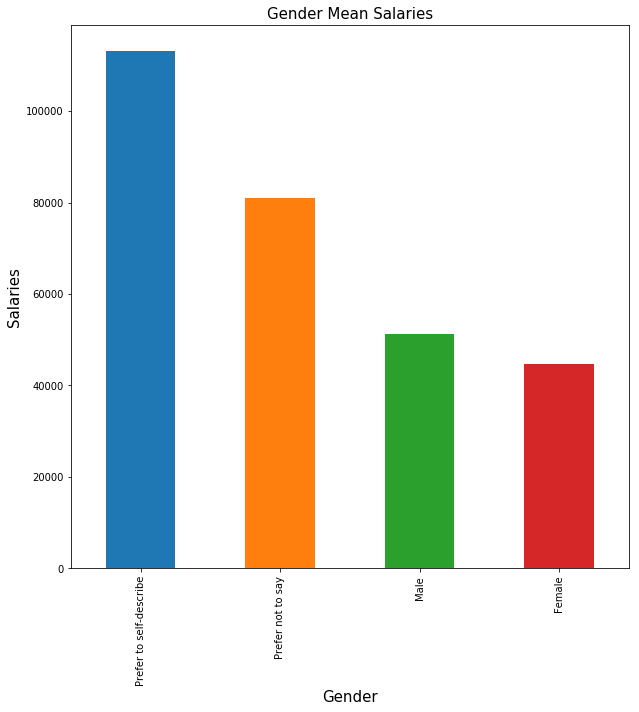

In [8]:
# Gender Mean Salaries
df['Q9'] = df['Q9'].astype(int)
fig = plt.figure(figsize = (10,10))
# Groups the Gender column with the salary column and sorts accordingly
Country_salaries= df.groupby(['Q1'])['Q9'].mean().sort_values(ascending = False)[0:20].plot(kind = 'bar')
plt.ylabel("Salaries",fontsize = 15)
plt.xlabel("Gender", fontsize = 15)
plt.title('Gender Mean Salaries', fontsize = 15)

plt.xticks(rotation = 90)

From the graph it is not much clear whether male earn more or female as most of the participants didn/t reveal their gender. 

In [9]:
# Have to one hot encode the gender column
gender = df['Q1']
df_gender = pd.get_dummies(data=gender, columns= [gender])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

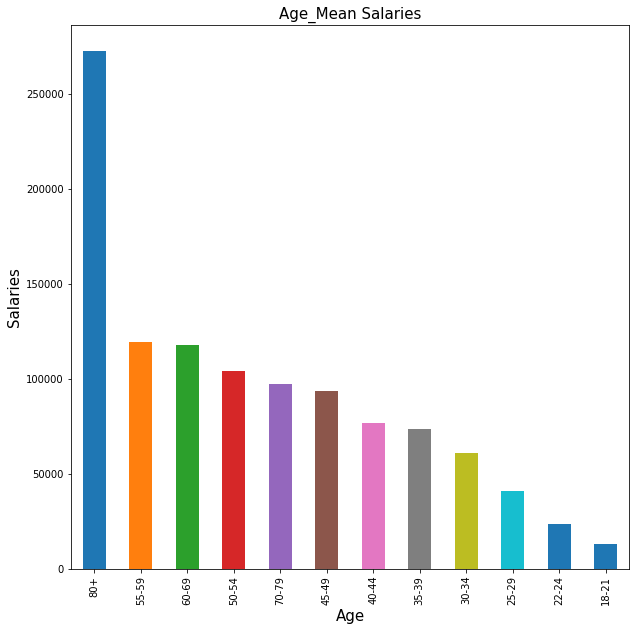

In [10]:
# Age_Mean Salaries
df['Q9'] = df['Q9'].astype(int)
fig = plt.figure(figsize = (10,10))
# Groups the age column with the salary column and sorts accordingly
Country_salaries= df.groupby(['Q2'])['Q9'].mean().sort_values(ascending = False)[0:20].plot(kind = 'bar')
plt.ylabel("Salaries",fontsize = 15)
plt.xlabel("Age", fontsize = 15)
plt.title('Age_Mean Salaries', fontsize = 15)

plt.xticks(rotation = 90)

We can see from the above plot that participants who are between the age of 18-21, 21-24 doesn't get much salary infact they get the least salary of all the age groups as most of them could be students at this age and they might be doing part time jobs instead of full time and the particpants  aged more than 80+ have higher salaries as they have more experience in their field and mostly they hold the top positions in the companies.

In [11]:
# Have to one hot encode the age column
age = df['Q2']
df_age = pd.get_dummies(data=age, columns= [age])

In [12]:
# Reduced the dimensionality of Location column by replacing countries with less 100 participants as other
location_counts = df['Q3'].value_counts()
value_mask = df.Q3.isin(location_counts.index[location_counts < 100])
df.loc[value_mask,'Q3'] = "Other"

In [13]:
# One hot encode the location column
location = df['Q3']
df_location = pd.get_dummies(data=location, columns= [location])

In [14]:
# cleaning Q4 highest level of education problem
# the below code is not necessary but still I just used to clean the Q4 column 
def clean_column(column):
    hparser=HTMLParser()  
    new_text=html.unescape(column)  # converts HTML character codes to ASCII equivalent
    lower_case = new_text.lower()  # converts all the letters to lower case
    spaces = re.sub('[\s]+', ' ', lower_case) # Removes the spaces
    link = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','',spaces) # Removes the URL's if it finds the lines with http. or www.
    alpha_numeric = re.sub('[^a-zA-Z\s]+', '', link) # Removes the alpha numeric symbols
    return alpha_numeric

clean_Q4 = df['Q4'].apply(lambda column: clean_column(column)) # Applies above changes made to all the rows in the data set
df['cleaned_Q4'] = clean_Q4

# One hot encoding of the Highest level of education
HLE = df['cleaned_Q4'] # HLE is Hihest level of education
df_HLE = pd.get_dummies(data=HLE, columns= [HLE])


Fillig the missing values

In [15]:
# Comparing Under Graduate Major with Current_job roles

a = df[df['Q5'].isnull()]['Q6'] # Gives the Current roles for the NaN values of under graduate major column
b = df[df['Q5'].isnull()]['Q5'] # Gives the null values of Under Graduate Major
pd.DataFrame({'Current_job':a, 'NaN ugm': b})
a.value_counts().head()

Software Engineer    40
Data Scientist       17
Student              12
Business Analyst     11
Data Analyst         11
Name: Q6, dtype: int64

The number of missing values for the under graduate major are currently working as software engineers and data scientist mostly so I prefer to replace NaN with Computer science (software engineering, etc.) 

In [16]:
# Replacing NaN with Computer science (software engineering, etc.)
df.loc[df['Q5'].isnull(), 'Q5'] = 'Computer science (software engineering, etc.)'

# One hot encoding of the Under Graduate Major
ugm = df['Q5']
df_ugm = pd.get_dummies(data=ugm, columns= [ugm])

In [17]:
# One hot encoding of the current role
current_role = df['Q6']
df_current_role = pd.get_dummies(data=current_role, columns= [current_role])

In [18]:
# One hot encoding of the Industry where the participant works
employer = df['Q7']
df_employer = pd.get_dummies(data=employer, columns= [employer])


Filling the missing values

In [19]:
# Comparing years of experience with Current_job roles

a = df[df['Q8'].isnull()]['Q6']
b = df[df['Q8'].isnull()]['Q8']
pd.DataFrame({'Current_job':a, 'NaN Experience': b})
a.value_counts().head()

Student               64
Business Analyst       4
Data Analyst           3
Research Scientist     1
Other                  1
Name: Q6, dtype: int64

Since most of the missing values are related to Student, I want to replace NaN with Not Applicable

In [20]:
# Replacing NaN with Not Applicable 
df.loc[df['Q8'].isnull(), 'Q8'] = 'Not Applicable'

# One hot encoding of the Years of experience where the participant works
work_experience = df['Q8']
df_work_experience = pd.get_dummies(data=work_experience, columns= [work_experience])


In [21]:
# One hot encoding of the IDE's

encoded_columns = []
for i in range(len(k_df.columns)): # for selecting all the columns of Q13
    x = "Q13_" + "Part_" + str(i)
    if x in k_df.columns:
        encoded_columns.append(x)
         
df_IDE = pd.get_dummies(data=df[encoded_columns], columns= encoded_columns)

In [22]:
# One hot encoding of the Notebooks

notebooks = []
for i in range(len(k_df.columns)): # for selecting all the columns of Q14
    x = "Q14_" + "Part_" + str(i)
    if x in k_df.columns:
        notebooks.append(x)
        
df_notebooks = pd.get_dummies(data=df[notebooks], columns= notebooks)

# df_notebooks['total_notebooks']= df_notebooks.sum(axis=1)

In [23]:
# One hot encoding of the Programming languages

pl = []
for i in range(len(k_df.columns)): # for selecting all the columns of Q16
    x = "Q16_" + "Part_" + str(i)
    if x in k_df.columns:
        pl.append(x)
         
df_pl = pd.get_dummies(data=df[pl], columns= pl)

# df_pl['total_pl']= df_pl.sum(axis=1)


Filling the missing values

In [24]:
# Filling NaN values of ML experiencing
df['Q25'].value_counts()

< 1 year                                                                 4194
1-2 years                                                                3574
2-3 years                                                                1664
I have never studied machine learning but plan to learn in the future    1225
3-4 years                                                                 921
5-10 years                                                                743
4-5 years                                                                 650
10-15 years                                                               256
20+ years                                                                 129
I have never studied machine learning and I do not plan to                 59
Name: Q25, dtype: int64

In [25]:
# Filling NaN values of ML experiencing

a = df[df['Q25'].isnull()]['Q25']
c = df[df['Q25'].isnull()]['Q6']
b = df[df['Q6'] == 'Student']['Q25'] # checking how much experience generally does students have 
print(pd.DataFrame({'NaN MLE':a,'current_role': c}))
print(c.value_counts())
b.value_counts()

      NaN MLE             current_role
1695      NaN             Data Analyst
1723      NaN                  Student
1805      NaN               Consultant
2078      NaN                  Student
2150      NaN                  Student
2177      NaN    DBA/Database Engineer
3678      NaN                  Manager
3738      NaN                    Other
4248      NaN  Product/Project Manager
9489      NaN       Research Assistant
9490      NaN         Business Analyst
9506      NaN                  Student
9521      NaN                  Student
9577      NaN             Statistician
9678      NaN             Data Analyst
9840      NaN             Data Analyst
10041     NaN             Data Analyst
10150     NaN           Data Scientist
10421     NaN           Data Scientist
10650     NaN                  Student
10651     NaN           Data Scientist
10655     NaN                  Student
10659     NaN         Business Analyst
10660     NaN                  Student
10661     NaN           D

< 1 year                                                                 966
1-2 years                                                                584
I have never studied machine learning but plan to learn in the future    212
2-3 years                                                                145
3-4 years                                                                 56
4-5 years                                                                 26
5-10 years                                                                19
I have never studied machine learning and I do not plan to                11
10-15 years                                                                4
20+ years                                                                  2
Name: Q25, dtype: int64

Since most of the missing values are from Students and mode of the Q25 column values which is less than < 1 year,  I will replace all the missing values with Machine Learning experience with <1 year experience since there is a high probability for the experience value to be in that range seeing the distribution of all values.

In [26]:
# Replacing NaN with < 1 year

df.loc[df['Q25'].isnull(), 'Q25'] = '< 1 year'

In [27]:
# One hot encoding of the ML experience 

MLE = df['Q25'] # MLE for Machine Learning Experience
df_MLE = pd.get_dummies(data=MLE, columns= [MLE])

In [28]:
# One hot encoding of the salries

salary = df['Q9'] 
df_salary = pd.get_dummies(data=salary, columns= [salary])

One hot encoding of columns from Q27 to Q39 which are related to computer cloud services, online learning sources for data science, machine learning products etc

In [29]:

# One hot encoding of the group of columns

columns_group = []
# for i, j in zip (range(26,32),range(len(k_df.columns))):
for i in range(len(k_df.columns)):
    x1 = "Q27" + "_Part_" + str(i)
    if x1 in k_df.columns:
        columns_group.append(x1)
    x2 = "Q28" + "_Part_" + str(i)
    if x2 in k_df.columns:
        columns_group.append(x2)
    x3 = "Q29" + "_Part_" + str(i)
    if x3 in k_df.columns:
        columns_group.append(x3)
    x4 = "Q30" + "_Part_" + str(i)
    if x4 in k_df.columns:
        columns_group.append(x4)
    x5 = "Q31" + "_Part_" + str(i)
    if x5 in k_df.columns:
        columns_group.append(x5)
    x6 = "Q32" + "_Part_" + str(i)
    if x6 in k_df.columns:
        columns_group.append(x6)
    x7 = "Q33" + "_Part_" + str(i)
    if x7 in k_df.columns:
        columns_group.append(x7)
    x8 = "Q36" + "_Part_" + str(i)
    if x8 in k_df.columns:
        columns_group.append(x8)
    x9 = "Q37" + "_Part_" + str(i)
    if x9 in k_df.columns:
        columns_group.append(x9)
    x10 = "Q38" + "_Part_" + str(i)
    if x10 in k_df.columns:
        columns_group.append(x10)
        

df_columns_group = pd.get_dummies(data=df[columns_group], columns= columns_group)



#### Exploratory Analysis

#### 1. Countries versus Salaries relation
Here I assumed that if the number of participants from a country are less than 100 I have replaced them with 'other'. After that I have plotted the mean salaries of all the salries from that particular country and then showed which country does get the most salary. 

In [30]:
# Reduced the dimensionality of Location column by replacing countries with less 100 participants as other
location_counts = df['Q3'].value_counts()
value_mask = df.Q3.isin(location_counts.index[location_counts < 100])
df.loc[value_mask,'Q3'] = "Other"

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

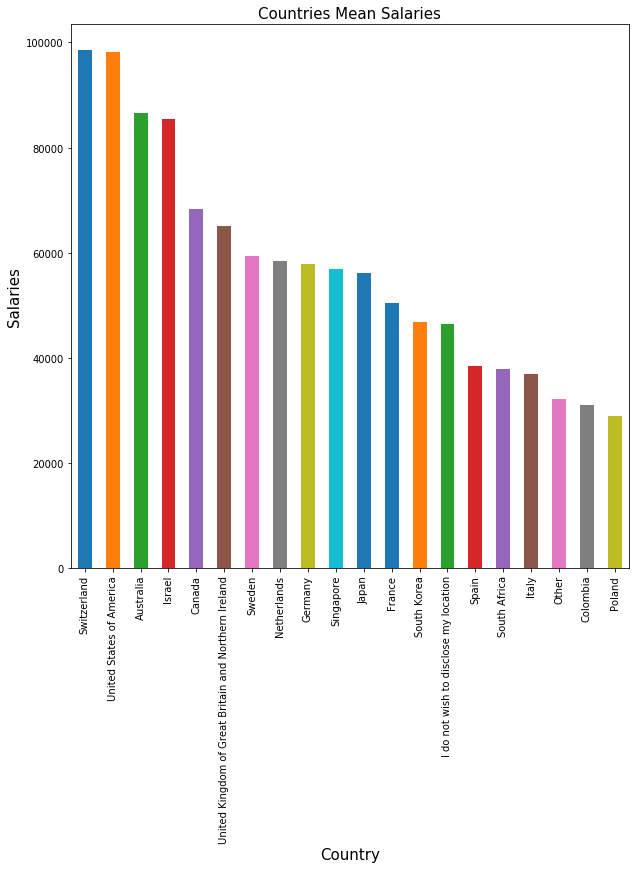

In [31]:
df['Q9'] = df['Q9'].astype(int)
fig = plt.figure(figsize = (10,10))
Country_salaries= df.groupby(['Q3'])['Q9'].mean().sort_values(ascending = False)[0:20].plot(kind = 'bar')
plt.ylabel("Salaries",fontsize = 15)
plt.xlabel("Country", fontsize = 15)
plt.title('Countries Mean Salaries', fontsize = 15)

plt.xticks(rotation = 90)

From the above graph we can see that participants from  Switzerland have got highest salary compared to all other countries participants and it is almost equal to United States of America.

This plot shows the mean salaries of the top 5 countries from where most of the participants have took part in survey, as you can see US has topped the chart with an incredible salary and also check whether this scenario is same for the students who do part time jobs just to know that the data science has a very scope in US compared to other parts of the world

#### 2. Highest Education Level versus Salaries relation

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

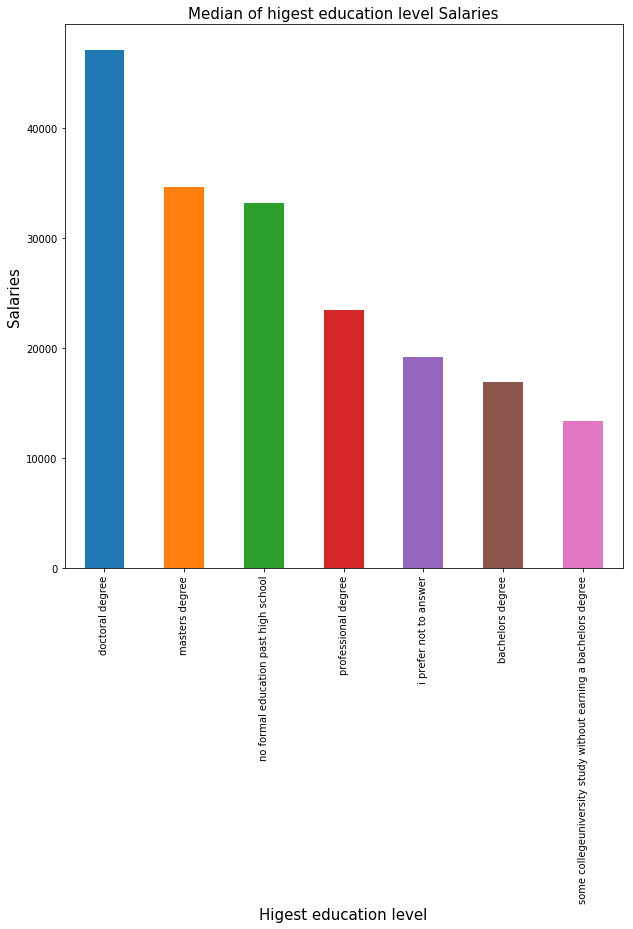

In [32]:

fig = plt.figure(figsize = (10,10))
HLE_salaries= df.groupby(['cleaned_Q4'])['Q9'].median().sort_values(ascending = False)[0:20].plot(kind = 'bar')
plt.ylabel("Salaries",fontsize = 15)
plt.xlabel("Higest education level", fontsize = 15)
plt.title('Median of higest education level Salaries', fontsize = 15)

plt.xticks(rotation = 90)


It can be inferred from the above graph that the doctoral degree students tend to get more salaries and it is obvious too.

#### 3. Current Role versus salaries relation

In [33]:
df['Q6'].unique()

array(['Other', 'Data Scientist', 'Data Analyst', 'Software Engineer',
       'Student', 'Research Assistant', 'Chief Officer', 'Manager',
       'Research Scientist', 'Business Analyst', 'Consultant',
       'Data Engineer', 'Developer Advocate', 'Product/Project Manager',
       'Marketing Analyst', 'Principal Investigator', 'Salesperson',
       'DBA/Database Engineer', 'Statistician', 'Data Journalist'],
      dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

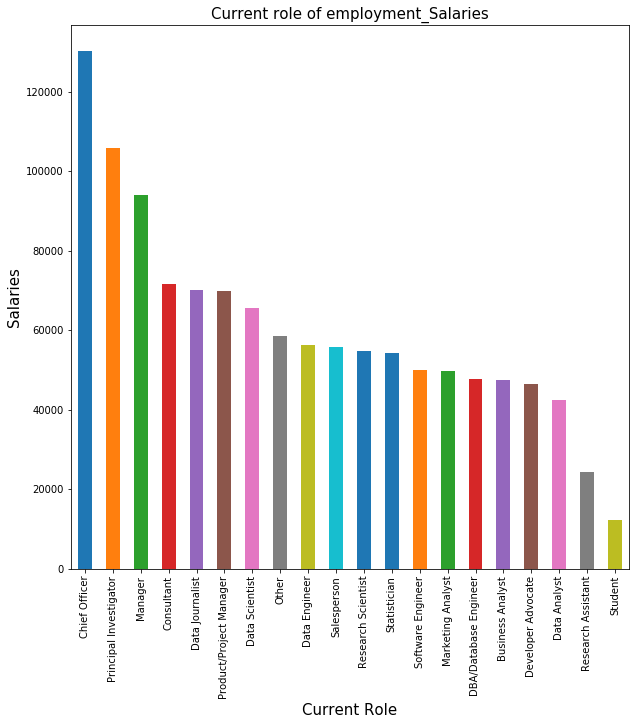

In [34]:
fig = plt.figure(figsize = (10,10))
HLE_salaries= df.groupby(['Q6'])['Q9'].mean().sort_values(ascending = False)[0:20].plot(kind = 'bar')
plt.ylabel("Salaries",fontsize = 15)
plt.xlabel("Current Role", fontsize = 15)
plt.title('Current role of employment_Salaries', fontsize = 15)

plt.xticks(rotation = 90)


We can understand that student salary would be less as they work on part time basis

### Order of Feature Importance

For this I have used a Random Forest Regressor feature selection technique and selected 130 features for which I have the feature importance. So I have plotted them according to their feature importance and shown here below

In [36]:
# # selecting optimized features
# features_selected = result['features_names'][0:130]
# feature_importance = result['importances_values'][0:130]

# plt.figure(1, figsize=(30, 20))
# plt.title("Feature Importances", fontsize = 25)
# plt.xlabel('Features', fontsize = 25)
# plt.ylabel('Feature_importance', fontsize = 25)
# plt.bar(features_selected, feature_importance, color="g", align="center")
# plt.xticks( rotation=90, fontsize = 12)
# plt.yticks(fontsize = 12)
# plt.show()

In the above plot you can see that United States of America has got the highest feature importance and it is also valid since in the first plot we made in the exploratory analysis we have seen that United States of America has got the highest salaries (similar to Switzerland) in the world. 

### Most significant features
So we can say that all the features above relate mostly to the yearly compensation in a descending order. Seeing the trend of the above it can be inferred that the following features influence the yearly compensation the most:
1. The location of the employee
2. Age of the employee
3. Gender of the employee
4. Working experience

### Feature Selection Technique

Feature selection is also called variable selection or attribute selection. It is the automatic selection of attributes in your data (such as columns in tabular data) that are most relevant to the predictive modeling problem you are working on.

Feature selection can be used for the following reasons:(From Wiki)
1. Simplification of models to make them easier to interpret by researchers/users
2. Shorter training times
3. To avoid the curse of dimensionality,
4. Enhanced generalization by reducing overfitting (formally, reduction of variance)

I have manually picked the features from the data set after preprocessing the data and then I created a dataframe with 343 features. Then I used Random Forest Regressor Technique to generate the feature importance and then I have removed those features which aren't significant to predict the salary. Finally I have selected 130 features.

Random Forest regressor: A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size. I have used feature_importaces_ as my metric.

In [37]:
# Features selected manually and then appended into a dataframe

frames = [df_gender,df_age,df_location,df_HLE, df_ugm, df_current_role,df_employer,df_work_experience, df_IDE, df_notebooks, df_pl, df_MLE, df_columns_group] 
features_dataframe = pd.concat(frames, axis = 1)
features_dataframe

,Female,Male,Prefer not to say,Prefer to self-describe,18-21,22-24,25-29,30-34,35-39,40-44,...,Q28_Part_34_IBM Watson Studio,Q28_Part_35_IBM Watson Knowledge Catalog,Q28_Part_36_IBM Watson Assistant,Q28_Part_37_IBM Watson Discovery,Q28_Part_38_IBM Watson Text to Speech,Q28_Part_39_IBM Watson Visual Recognition,Q28_Part_40_IBM Watson Machine Learning,Q28_Part_41_Azure Cognitive Services,Q28_Part_42_None,Q28_Part_43_Other
1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
5,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
7,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


source: https://stackoverflow.com/questions/41900387/mapping-column-names-to-random-forest-feature-importances

In [38]:
# Using Random Forest Regressor for feature selection 
    
Salaries_X = features_dataframe
Salaries_Y = df['Q9']

rfr = RandomForestRegressor(bootstrap=True)      
rfr = rfr.fit(Salaries_X, Salaries_Y)
importances = rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfr.estimators_], axis=0)
col = pd.Series(Salaries_X.columns)
indices = np.argsort(importances)[::-1]
indices_no = []
importances_values= []
feature_names = []

for f in range(Salaries_X.shape[1]):
    indices_no.append(f+1)
    feature_names.append(col[indices[f]])
    importances_values.append(importances[indices[f]])
    print( (f + 1, indices[f], col[indices[f]], importances[indices[f]]))
    

(1, 45, 'United States of America', 0.16812273687183027)
(2, 85, 'Student', 0.08873351496945778)
(3, 6, '25-29', 0.026325437512327576)
(4, 5, '22-24', 0.02579108669071028)
(5, 67, 'Chief Officer', 0.019028924704539436)
(6, 113, '30 +', 0.016034205631351585)
(7, 4, '18-21', 0.01155548161968353)
(8, 86, 'Academics/Education', 0.01151655507961931)
(9, 15, '80+', 0.01034785320557416)
(10, 16, 'Australia', 0.008951239176581558)
(11, 18, 'Canada', 0.007931631054268872)
(12, 41, 'Switzerland', 0.007802062965640046)
(13, 80, 'Research Assistant', 0.007676127434479339)
(14, 7, '30-34', 0.00741601080215505)
(15, 50, 'no formal education past high school', 0.007183379579456454)
(16, 164, '20+ years', 0.007122839308297742)
(17, 167, '5-10 years', 0.006778460651931183)
(18, 24, 'India', 0.006453751976857681)
(19, 105, '0-1', 0.006422351522724018)
(20, 23, 'I do not wish to disclose my location', 0.006368633214031537)
(21, 89, 'Computers/Technology', 0.006290973927011327)
(22, 143, 'Q16_Part_1_Pytho

In [39]:
# Creating a dataframe for the features and their importances and finding a cumulative sum of the importances

pd.set_option('display.max_rows', 500) # to view 500 rows of the dataframe
# converting lists into array
i_c = np.array(importances_values) 
features = np.array(feature_names)
df_indices_n_importances = pd.DataFrame({'indices_no': indices, 'features_names':features,'importances_values':importances_values})
result = df_indices_n_importances.sort_values(['importances_values'], ascending= False)
result['importances_cumulative_sum'] = result.importances_values.cumsum()


In [40]:
result

,indices_no,features_names,importances_values,importances_cumulative_sum
0,45,United States of America,0.168123,0.168123
1,85,Student,0.088734,0.256856
2,6,25-29,0.026325,0.283182
3,5,22-24,0.025791,0.308973
4,67,Chief Officer,0.019029,0.328002
5,113,30 +,0.016034,0.344036
6,4,18-21,0.011555,0.355591
7,86,Academics/Education,0.011517,0.367108
8,15,80+,0.010348,0.377456
9,16,Australia,0.008951,0.386407


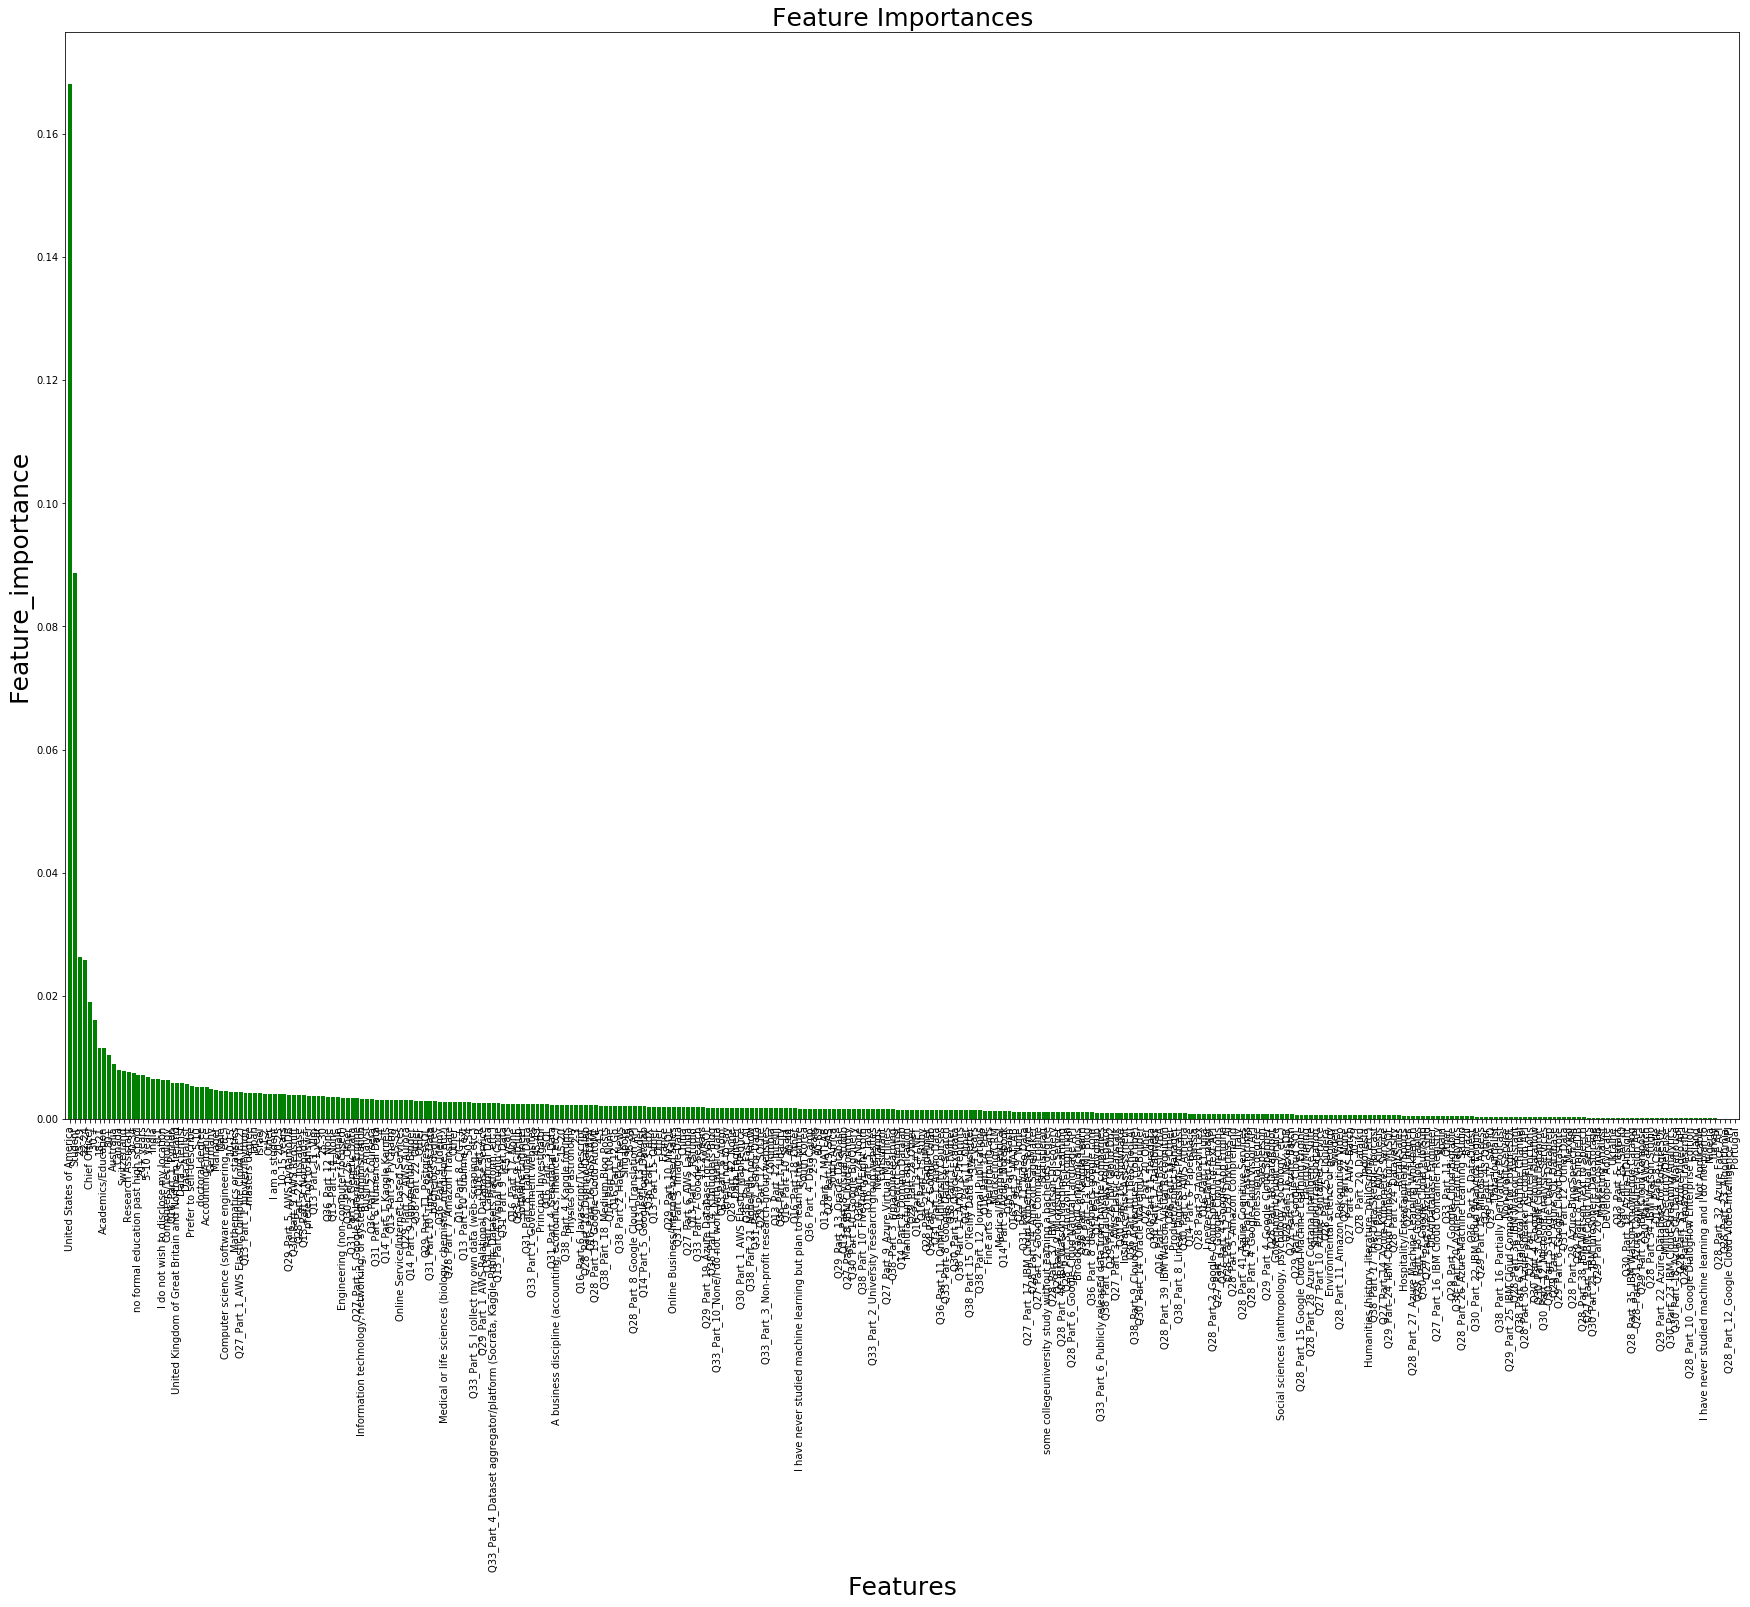

In [42]:
# Plot the feature importances of the random forest regressor 

features_selected = result['features_names']
feature_importance = result['importances_values']

plt.figure(1, figsize=(30, 20))
plt.title("Feature Importances", fontsize = 25)
plt.xlabel('Features', fontsize = 25)
plt.ylabel('Feature_importance', fontsize = 25)
plt.bar(range(Salaries_X.shape[1]), importances[indices], color="g", align="center")
plt.xticks(range(Salaries_X.shape[1]), Salaries_X.columns[indices], rotation=90)
plt.xlim([-1, Salaries_X.shape[1]])
plt.show()

Text(0.5,1,' Feature_importance dependency on number of features')

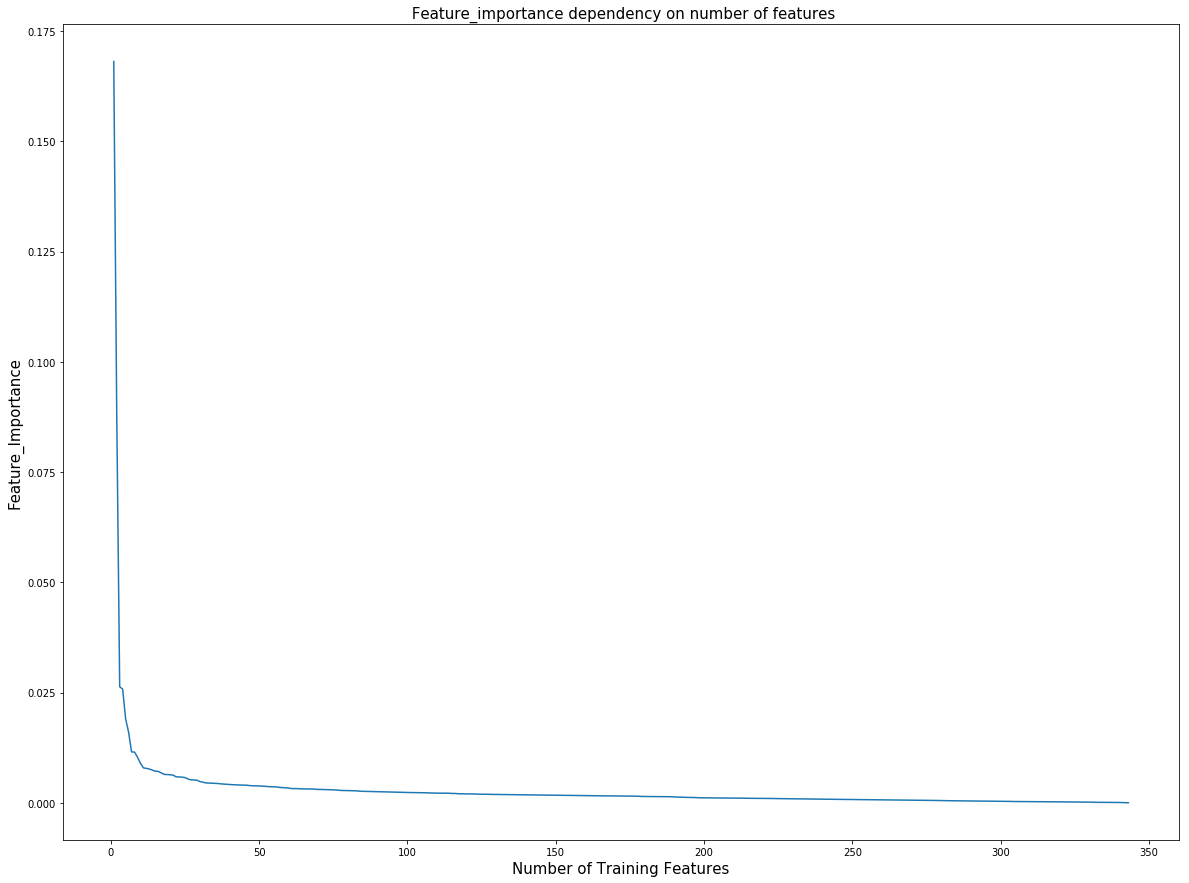

In [43]:
# Plotting Feature importance with respect to number of features

x = np.linspace(1,343,343)
plt.figure(1, figsize=(20, 15))
y = result['importances_values']
ax = plt.plot(x, y, '-')
plt.xlabel('Number of Training Features', fontsize = 15)
plt.ylabel('Feature_Importance', fontsize = 15)
plt.title(' Feature_importance dependency on number of features',fontsize = 15)


From the above graph it can be seen that the feature importance becomes almost zero(0.000994) at 216 features but from 130 features to 190 features the difference of the feature importance is just 0.001027 (0.002021	 - 0.000994) which means these features are more like a noise in the model and if they are included in the model they increase the complexity of the model and further the variance of the model. So I have selected 130 features for modelling. 

### 4. Model Implementation
(For the below information I have referred Wikipedia, Quora, Course Presentations)

Regression is a technique from statistics that is used to predict values of a desired target quantity when the target quantity is continuous.

The 4 regression algorithms I have used are as follows:
1. Lasso regression:  Lasso (least absolute shrinkage and selection operator) is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the statistical model it produces. This is the reason for selecting this model.

 Pros:
Lasso is a better way to analyze data and capture relationships in the data and avoid overfitting. It is an automatic variable selection technique.

 Cons:
Since lasso regression doesn't have a closed form solution it's computation time is high. Since it encourages in shrinking the coefficients to zero there is a probability to loose some of the significant features. 


2. Ridge Regression: Ridge Regression is a remedial measure taken to alleviate multicollinearity amongst regression predictor variables in a model. Since it doesn't leave out the one of the correlated columns, I have selected this model.

 Pros:
It chooses the feature's estimates (β) to penalize in such a way that less influential features (Some features cause very small influence on dependent variable) undergo more penalization keeping the multicorrelated features too in the data. It's a closed form solution and runs faster.

 Cons:
When the (β) values change dramatically ridge regression doesn't perform better


3. Decision tree Regression: It assigns a class variable to all of the records, using attributes of other variables to predict a class

 Pros:
Decision Trees chooses the most predictive feature to split the data on and there is no need to normalize the data. Since we have large data this model can be used and it is easy to interpret.

 Cons:
Easyly overfits or underfits the data since it doesn't model interactions between features. 


4. Random Forest Regression: Since I was unable to acheive good scores by normal Models I opted to use Ensembles, A Bootstrap method. Especially in Random forest, it is a Bagging Model and it works by changing the algorithm for the way that the sub-trees are learned so that the resulting predictions from all of the subtrees have less correlation and overall accuracy is high. In this model trees are made uncorrelated which reduces the variance in the model. 

 Pros & Cons:
Advantage of this method is we can acheive higher accuracies, but It can also lead to overfitting of the Model which needs to be taken care. Also, Random Forest can handle Missing values, although we repleaced missing values in our case, This Model can be used even with missing values


In [44]:
# Splitting features
Salaries_X_new = Salaries_X[features_selected]
Salaries_Y = df['Q9']

# Splitting the dataset into training/testing set (70,30)
Salaries_X_new, Salaries_X_new_test, Salaries_Y, Salaries_Y_test = train_test_split(Salaries_X_new,Salaries_Y,test_size=0.30)


In [ ]:
def algorithm(Salaries_X_new, Salaries_Y):
    models = []
    models.append(('lasso', linear_model.Lasso(alpha=0.5)))
    models.append(('ridge', Ridge(alpha=0.5)))
    models.append(('RFR', RandomForestRegressor(n_estimators = 100, max_depth = 10 )))
    models.append(('DTR', DecisionTreeRegressor(max_depth=10)))
    
    names = []
    for name,modelname in models:
        model = modelname
        model_scores = cross_val_score(model, Salaries_X_new, Salaries_Y, cv=10)
        names.append(name)
        print(name)
        print('Each Fold Accuracy:',model_scores)
        model_cv_mean = np.mean(model_scores)
        model_cv_variance = np.var(model_scores)
        print('model Mean score : ', model_cv_mean)
        print('model Score variance : ', model_cv_variance)
        print('------------------------------------------')
    

In [ ]:
algorithm(Salaries_X_new, Salaries_Y)

In [ ]:
algorithms = { }
algorithms['Regressor'] = ['Lasso Regeression','Ridge Regeression','Random Forest Regressor', 'Decision Tree Regressor']
algorithms['mean'] = [0.4398569995028169, 0.4399627239156361, 0.40646418869067197,0.26629456387014017 ]
algorithms['variance'] = [0.00292439212534083,0.0029110526024915075, 0.002644696123648838, 0.009798559173271937]
algorithms = pd.DataFrame(algorithms)
algorithms

From the above results it can be seen that ridge model's performance is better and it is equivalent to lasso when compared to the bagging technique. 
The general functioning of Lasso and Ridge is that they introduce bias in the model to reduce the variance which is due high model complexity where as random forest regressor decreases the bias by increasing the variance since uncorrelated trees are used in this model.
But as you see the variance of each fold in the ridge model is high when compared to the random forest regressor, so I will finalize my model after hyper parameter tuning. 

### 5. Model Tuning

Code referred from tutorial

### Lasso Regression

In [ ]:
from sklearn.metrics import make_scorer, r2_score, confusion_matrix

reg_gridsearch_LR = linear_model.Lasso(random_state=42)
#Parameters to test
parameters = {'alpha':[0.5,1,3], # Constant that multiplies the L1 term. Defaults to 1.0.
             'normalize':[True,False]} #

# Compare parameters by score of model 
acc_scorer_lm = make_scorer(r2_score)

# Run the grid search
grid_obj_lm = GridSearchCV(reg_gridsearch_LR, parameters,cv = 10, scoring=acc_scorer_lm) # Cross validating with 10 folds
grid_obj_lm = grid_obj_lm.fit(Salaries_X_new, Salaries_Y)

reg_gridsearch_LR = grid_obj_lm.best_estimator_  #Select best parameter combination

In [ ]:
reg_gridsearch_LR  # print out the optimal params so grid search does not need to be rerun

In [ ]:
reg_gridsearch_LR.fit(Salaries_X_new, Salaries_Y)
r2score_LR = reg_gridsearch_LR.score(Salaries_X_new, Salaries_Y)
r2score_LR

### Ridge Regression

In [ ]:
from sklearn.metrics import make_scorer, r2_score, confusion_matrix

reg_gridsearch_RR =  Ridge(random_state=42)
#Parameters to test
parameters = {'alpha':range(0,10,1), # Constant that multiplies the L1 term. Defaults to 1.0.
             'normalize':[True,False]} #

# Compare parameters by score of model 
acc_scorer_lm = make_scorer(r2_score)

# Run the grid search
grid_obj_lm = GridSearchCV(reg_gridsearch_RR, parameters,cv = 10,  scoring=acc_scorer_lm) # Cross validating with 10 folds
grid_obj_lm = grid_obj_lm.fit(Salaries_X_new, Salaries_Y)

reg_gridsearch_RR = grid_obj_lm.best_estimator_  #Select best parameter combination

In [ ]:
reg_gridsearch_RR  # print out the optimal params so grid search does not need to be rerun

In [ ]:
reg_gridsearch_RR.fit(Salaries_X_new, Salaries_Y)
r2score_RR = reg_gridsearch_RR.score(Salaries_X_new, Salaries_Y)
r2score_RR

### Random Forest Regressor

source: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [ ]:
from sklearn.metrics import make_scorer, r2_score, confusion_matrix

reg_gridsearch_RFR =  RandomForestRegressor(random_state=42)
#Parameters to test
parameters = {'max_depth': [1, 5,10],
 'n_estimators': [100,150,200]} # these are some of the better  parameters and I have get this information from a the source which I cited above

# Compare parameters by score of model 
acc_scorer_lm = make_scorer(r2_score)

# Run the grid search
grid_obj_lm = GridSearchCV(reg_gridsearch_RFR, parameters,cv = 10,  scoring=acc_scorer_lm) # Cross validating with 10 folds
grid_obj_lm = grid_obj_lm.fit(Salaries_X_new, Salaries_Y)

reg_gridsearch_RFR = grid_obj_lm.best_estimator_  #Select best parameter combination

In [ ]:
reg_gridsearch_RFR  # print out the optimal params so grid search does not need to be rerun

In [ ]:
reg_gridsearch_RFR.fit(Salaries_X_new, Salaries_Y)
r2score_RFR = reg_gridsearch_RFR.score(Salaries_X_new, Salaries_Y)
r2score_RFR

### Decistion Tree Regression

In [ ]:
from sklearn.metrics import make_scorer, r2_score, confusion_matrix

reg_gridsearch_DTR =  DecisionTreeRegressor(random_state=42)
#Parameters to test
parameters = {'max_depth': [1, 5,10],'min_samples_leaf':[1]} 

# Compare parameters by score of model 
acc_scorer_lm = make_scorer(r2_score)

# Run the grid search
grid_obj_lm = GridSearchCV(reg_gridsearch_DTR, parameters,cv = 10,  scoring=acc_scorer_lm) # Cross validating with 10 folds
grid_obj_lm = grid_obj_lm.fit(Salaries_X_new, Salaries_Y)

reg_gridsearch_DTR = grid_obj_lm.best_estimator_  #Select best parameter combination

In [ ]:
reg_gridsearch_DTR  # print out the optimal params so grid search does not need to be rerun

In [ ]:
reg_gridsearch_DTR.fit(Salaries_X_new, Salaries_Y)
r2score_DTR = reg_gridsearch_DTR.score(Salaries_X_new, Salaries_Y)
r2score_DTR

In [ ]:
algorithms = { }
algorithms['Regressor'] = ['Lasso Regeression','Ridge Regeression','Random Forest Regressor', 'Decision Tree Regressor']
algorithms['r2score'] = [r2score_LR, r2score_RR,r2score_RFR, r2score_DTR]
algorithms = pd.DataFrame(algorithms)
algorithms

From the above r2 scores we can say that the Random Forest Regressor performs better compared to all models. In this model trees are made uncorrelated which reduces the variance in the model and that's why predictions are made more accurately when compared to others.

#### 6. Testing and Discussion

From the above dataframe we can see that Random Forest Regressor has performed the best and I am using this model to check predictions on my testing data

In [ ]:
# Applying Random Forest Regressor to the testing data

Predictions_RFR = reg_gridsearch_RFR.predict(Salaries_X_new_test)
r2_score(Salaries_Y_test,Predictions_RFR)


From the above it can be seen that the training score score is 0.56 whereas the testing score is 0.42. We can say that , there is a overfitting of the data. The model is not understanding the pattern of the model whereas it is just remembering which is leading to a less test score. To improve the accuracy of the model I can include more parameters for tuning like number of features used for a split and increasing number of estimators too increases as it increases the scope of splitting more features into different trees and reduce the correlaton between them.